In [1]:
import os
# Change the terminal placement to the folder where the py files  are located  
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from Zoro_nest import *
from functions import *
from Zoro_MD import * 
from help_function import *
from Zoro_new_Z import * 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import pandas as pd

/Users/ilyeshammouda/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#fixer le seed 
seed=10
np.random.seed(seed)

In [4]:
# problem set up
n = 2000
s = int(0.1*n)
# noise amplitude
noiseamp = 0.001
#noiseamp = 0
decay_factor=0.5
#x_star=100*(tools.sparse_vector(n=n,s=s))
x_star=50*(tools.vecteur_sparse_support_S(n=n,s=s))
A=np.random.normal(size=(n,n)) # Simulate a Gaussian Matrix for the norm_with_a_Gaussian_matrix function
#obj_func = SparseQuadric(n, s, noiseamp)
#obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)
#obj_func=SparseQuadric(n, s, noiseamp)
obj_func=square_of_the_difference_support_S(n,x_star,noiseamp)
#obj_func=norm_with_a_Gaussian_matrix(n,x_star,noiseamp,A)
# Choose initialization
x1    = np.random.randn(n)
x1    =100*x1/np.linalg.norm(x1)
sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":0.001, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          'M':A,
          #"num_samples": int(np.ceil(np.log(len(x0))*sparsity))
          "num_samples":int(1e3)}


In [5]:
#IHT set up 
lamda_IHT=10 # lambda initialisation 
threshold_IHT=1e-15 # lambda threshold
C_IHT=0.9 # The update param for the lambda_k at each itteration.  
step_IHT=1/(3.8*n)# The step of the IHT algo 
itt_IHT=500  # The maximum number of itterations for the IHT algo

In [6]:
#ISTA set up 
lamda_ISTA=4 # lambda initialisation 
threshold_ISTA=0.01 # lambda threshold
C_ISTA=0.9 # The update param for the lambda_k at each itteration.  
step_ISTA=1/(3*n) # The step of the IHT algo 
itt_ISTA=40  # The maximum number of itterations for the IHT algo



In [7]:
# IHT classique set up
itt_IHT_cla=500
setp_IHT_cla=1/(3.8*n)
s_IHT=sparsity

In [8]:
#Original Version of the Zoro Algo with different algos for estimating the gradient
opt_Co  = ZORO(x1, obj_func, params,algo='CoSaMP', function_budget= int(1e7),x_star=x_star,s=s)
opt_Lasso  = ZORO(x1, obj_func, params,algo='Lasso', function_budget= int(1e5),itt_Lasso=100,tol_Lasso=0.01,s=s)
opt_DLasso  = ZORO(x1, obj_func, params,algo='DLasso', function_budget= int(2e7),itt_Lasso=100,tol_Lasso=0.01,s=s)
opt_IHT  = ZORO(x1, obj_func, params,algo='IHT_Classique', function_budget= int(1e8),s=sparsity,itt_IHT=itt_IHT_cla,step_IHT=setp_IHT_cla)
opt_IHT_ad  = ZORO(x1, obj_func, params,algo='IHT_ad', function_budget= int(1e5),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT,s=s)
opt_ista_ad  = ZORO(x1, obj_func, params,algo='ISTA_ad', function_budget= int(1e5),threshold_ista=threshold_ISTA,C_ista=C_ISTA,lamda_ista=lamda_ISTA,itt_ista=itt_ISTA,step_ista=step_ISTA,s=s)
# the actual optimization routine
termination=False

here {'function_evals': 0, 'function_budget': 10000000, 'function_target': None, 'f': <functions.square_of_the_difference_support_S object at 0x7fc7d1b85d90>, 'x': array([ 0.28682184, -0.18307024,  1.18266355, ..., -2.59170606,
        2.95248424, -1.21960338]), 'n': 2000, 'algo': 'CoSaMP', 't': 0, 'delta': 0.0001, 'sparsity': 200, 'step_size': 0.001, 'num_samples': 1000, 's': 200, 'step_IHT': 1e-07, 'itt_IHT': 30, 'threshold_IHT': 2, 'C_IHT': 0.9, 'lamda_IHT': 0.1, 'step_ista': 1e-07, 'itt_ista': 30, 'threshold_ista': 2, 'C_ista': 0.9, 'lamda_ista': 0.1, 'epsilon': 0, 'r': 3, 'lmax': 20, 'CV_lasso': 5, 'itt_Lasso': 100, 'x_star': array([ 66.57932521,  35.76394872, -77.27001461, ...,   0.        ,
         0.        ,   0.        ]), 'tol_Lasso': 0.001, 'cosamp_params': {'Z': array([[ 1, -1, -1, ..., -1,  1, -1],
       [ 1, -1, -1, ...,  1,  1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       ...,
       [-1, -1,  1, ...,  1, -1, -1],
       [ 1, -1,  1, ...,  1,  1,  1],
       [ 1,

In [9]:
# Zoro with nestarov
opt_Co_nest  = ZORO_nest(x1, obj_func, params,algo='CoSaMP', function_budget= int(1e7),x_star=x_star,s=s)
opt_IHT_ad_nest  = ZORO(x1, obj_func, params,algo='IHT_ad', function_budget= int(1e7),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT,s=s)

here {'function_evals': 0, 'function_budget': 10000000, 'function_target': None, 'f': <functions.square_of_the_difference_support_S object at 0x7fc7d1b85d90>, 'x': array([ 0.28682184, -0.18307024,  1.18266355, ..., -2.59170606,
        2.95248424, -1.21960338]), 'n': 2000, 'algo': 'CoSaMP', 't': 0, 'delta': 0.0001, 'sparsity': 200, 'step_size': 0.001, 'num_samples': 1000, 's': 200, 'step_IHT': 1e-07, 'itt_IHT': 30, 'threshold_IHT': 2, 'C_IHT': 0.9, 'lamda_IHT': 0.1, 'step_ista': 1e-07, 'itt_ista': 30, 'threshold_ista': 2, 'C_ista': 0.9, 'lamda_ista': 0.1, 'epsilon': 0, 'r': 3, 'lmax': 20, 'CV_lasso': 5, 'itt_Lasso': 100, 'x_star': array([ 66.57932521,  35.76394872, -77.27001461, ...,   0.        ,
         0.        ,   0.        ]), 'tol_Lasso': 0.001, 'cosamp_params': {'Z': array([[-1,  1, -1, ...,  1,  1, -1],
       [ 1, -1, -1, ...,  1,  1, -1],
       [ 1, -1, -1, ...,  1, -1,  1],
       ...,
       [-1, -1,  1, ...,  1, -1,  1],
       [ 1,  1, -1, ..., -1, -1, -1],
       [ 1,

# Perform the original Zoro algorithm with different methods for estimating the gradient

## Comparing the algorithm's performance by using a fixed Z versus updating Z at each step for gradient estimation.

In [10]:
#performance_log_ZORO_Co_Z_New_Z,norm_Estimated_Grad_minus_true_list_CO_New_Z,est_grad_norm_list_CO_New_Z=opt_Co_New_Z.Zoro_New_Z()

In [11]:
performance_log_ZORO_Co_Z,norm_Estimated_Grad_minus_true_list_CO,est_grad_norm_list_CO=opt_Co.Zoro()

Estimated f(x_k): 480424.771793 norm of the estimated gradient: 38.101746  function evals: 2000 Norm True grad: 1386.253618 
Estimated f(x_k): 480376.753517 norm of the estimated gradient: 38.773311  function evals: 4000 Norm True grad: 1386.184338 
Estimated f(x_k): 480327.362703 norm of the estimated gradient: 36.710680  function evals: 6000 Norm True grad: 1386.113073 
Estimated f(x_k): 480282.750734 norm of the estimated gradient: 38.491208  function evals: 8000 Norm True grad: 1386.048700 
Estimated f(x_k): 480233.514624 norm of the estimated gradient: 38.530572  function evals: 10000 Norm True grad: 1385.977655 
Estimated f(x_k): 480184.564788 norm of the estimated gradient: 37.860201  function evals: 12000 Norm True grad: 1385.907018 
Estimated f(x_k): 480136.552647 norm of the estimated gradient: 37.736165  function evals: 14000 Norm True grad: 1385.837727 
Estimated f(x_k): 480089.385901 norm of the estimated gradient: 39.243070  function evals: 16000 Norm True grad: 1385.7696

In [12]:
performance_log_ZORO_Co_Z_nest,norm_Estimated_Grad_minus_true_list_CO_nest,est_grad_norm_list_CO_nest=opt_Co_nest.Zoro()

Estimated f(x_k): 480424.770457 norm of the estimated gradient: 37.417600  function evals: 2000 Norm True grad: 1386.253618 
Estimated f(x_k): 478121.025249 norm of the estimated gradient: 38.198442  function evals: 4000 Norm True grad: 1382.925922 
Estimated f(x_k): 475721.046661 norm of the estimated gradient: 36.886630  function evals: 6000 Norm True grad: 1379.450682 
Estimated f(x_k): 473451.600935 norm of the estimated gradient: 38.490857  function evals: 8000 Norm True grad: 1379.450682 
Estimated f(x_k): 471056.154078 norm of the estimated gradient: 36.799782  function evals: 10000 Norm True grad: 1381.361544 
Estimated f(x_k): 468778.639510 norm of the estimated gradient: 37.917480  function evals: 12000 Norm True grad: 1386.578047 
Estimated f(x_k): 466378.554131 norm of the estimated gradient: 38.636561  function evals: 14000 Norm True grad: 1397.599676 
Estimated f(x_k): 463926.845201 norm of the estimated gradient: 37.532015  function evals: 16000 Norm True grad: 1418.7929

/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code/help_function.py:172: RuntimeWarning: overflow encountered in multiply
  return(2*grad)
/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code/Zoro_nest.py:81: RuntimeWarning: overflow encountered in multiply
  x_t_plus_1=(1-gamma_t)*x_t+gamma_t*y_t


Estimated f(x_k): 4239.288912 norm of the estimated gradient: 3.362148  function evals: 2080000 Norm True grad: inf 
Estimated f(x_k): 4220.904180 norm of the estimated gradient: 3.437922  function evals: 2082000 Norm True grad: inf 
Estimated f(x_k): 4201.716831 norm of the estimated gradient: 3.526957  function evals: 2084000 Norm True grad: inf 
Estimated f(x_k): 4181.587550 norm of the estimated gradient: 3.346906  function evals: 2086000 Norm True grad: inf 
Estimated f(x_k): 4163.225237 norm of the estimated gradient: 3.259496  function evals: 2088000 Norm True grad: inf 
Estimated f(x_k): 4145.478482 norm of the estimated gradient: 3.353652  function evals: 2090000 Norm True grad: inf 
Estimated f(x_k): 4127.074616 norm of the estimated gradient: 3.331183  function evals: 2092000 Norm True grad: inf 
Estimated f(x_k): 4109.107566 norm of the estimated gradient: 3.361518  function evals: 2094000 Norm True grad: inf 
Estimated f(x_k): 4091.138299 norm of the estimated gradient: 3.

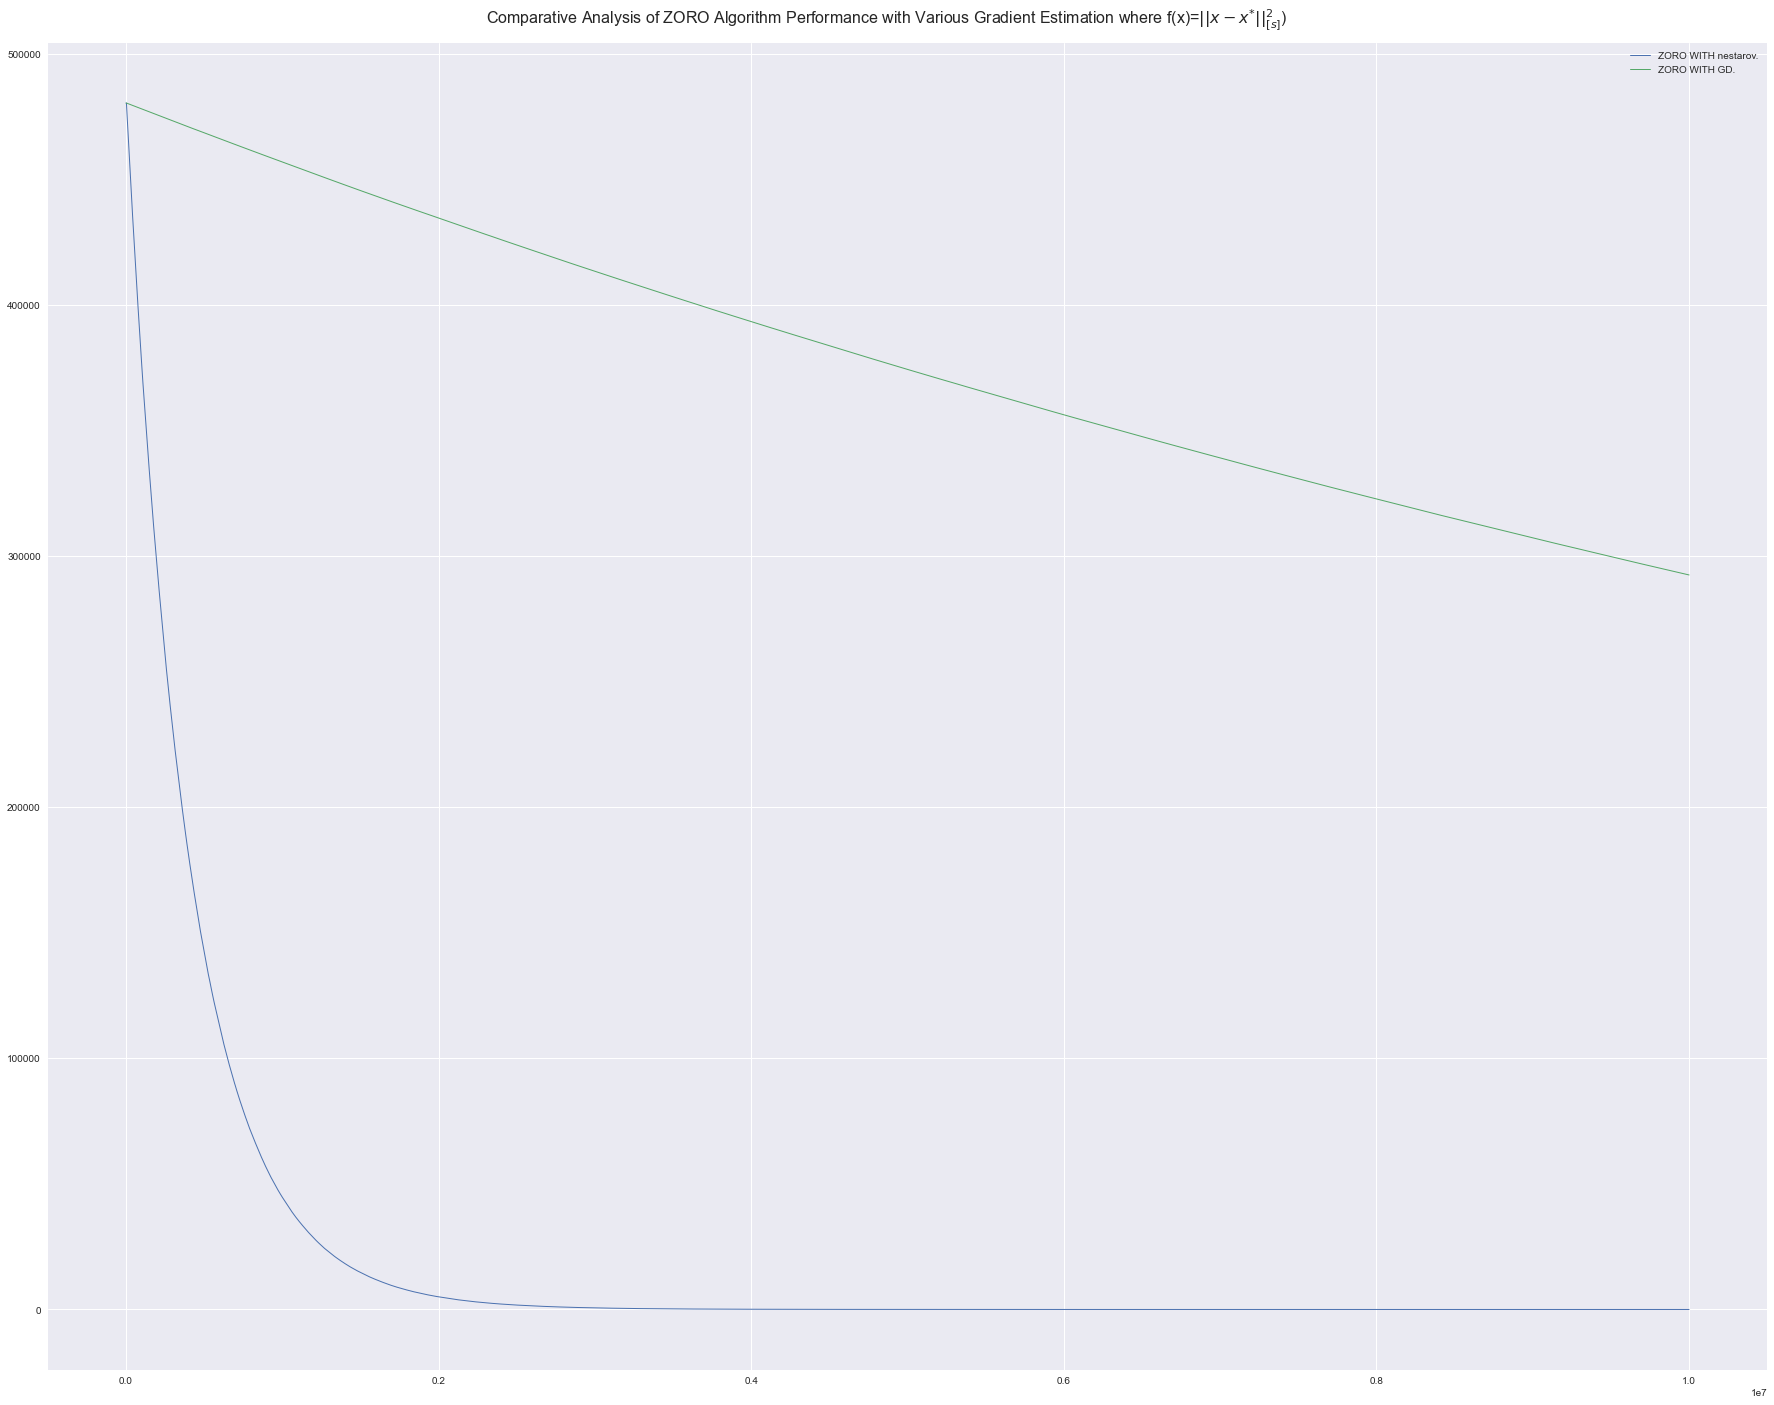

In [13]:
mpl.style.use('seaborn')

fig, axs = plt.subplots(1, 1, figsize=(25, 20))

ax1 = axs
ax1.plot(np.array(performance_log_ZORO_Co_Z_nest)[:,0],
 ((np.array(performance_log_ZORO_Co_Z_nest)[:,1])), linewidth=1 ,label = "ZORO WITH nestarov.")

ax1.plot(np.array(performance_log_ZORO_Co_Z)[:,0],
 ((np.array(performance_log_ZORO_Co_Z)[:,1])), linewidth=1, label = "ZORO WITH GD.")
ax1.legend()





plt.suptitle("Comparative Analysis of ZORO Algorithm Performance with Various Gradient Estimation where f(x)=$||x-x^{*}||_{[s]}^{2}$)", fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
# Save the algorithm's performance as an Excel file in the specified folder
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/performances_IHT_CO') 
data_frame_performance_log_ZORO_Co_Z = pd.DataFrame(performance_log_ZORO_Co_Z_2)
data_frame_est_grad_norm_list_CO = pd.DataFrame(est_grad_norm_list_CO_2)
data_frame_performance_log_ZORO_Co_Z.to_excel(f'performance_log_ZORO_Co_Z_noise{date.today()}.xlsx', index=False)
data_frame_est_grad_norm_list_CO.to_excel(f'est_grad_norm_list_CO_noise{date.today()}.xlsx', index=False)

In [ ]:
# Save the algorithm's performance as an Excel file in the specified folder
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/performances_IHT_CO') 
data_frame_performance_log_ZORO_DLasso = pd.DataFrame(performance_log_ZORO_DLasso_2)
data_frame_est_grad_norm_list_DLasso = pd.DataFrame(est_grad_norm_list_DLasso_2)
data_frame_performance_log_ZORO_DLasso.to_excel(f'performance_log_ZORO_DLasso_noise{date.today()}.xlsx', index=False)
data_frame_est_grad_norm_list_DLasso.to_excel(f'est_grad_norm_list_DLasso_noise{date.today()}.xlsx', index=False)

In [ ]:
performance_log_ZORO_IHT_ad,norm_Estimated_Grad_minus_true_list_IHT_ad,est_grad_norm_list_IHT_ad=opt_IHT_ad.Zoro()

In [ ]:
performance_log_ZORO_IHT,norm_Estimated_Grad_minus_true_list_IHT,est_grad_norm_list_IHT=opt_IHT.Zoro()

In [ ]:
performance_log_ZORO_IHT_2,norm_Estimated_Grad_minus_true_list_IHT_2,est_grad_norm_list_IHT_2=opt_IHT_2.Zoro()

In [ ]:
performance_log_ZORO_Lasso,norm_Estimated_Grad_minus_true_list_Lasso,est_grad_norm_list_Lasso=opt_Lasso.Zoro()

In [ ]:
performance_log_ZORO_DLasso,norm_Estimated_Grad_minus_true_list_DLasso,est_grad_norm_list_DLasso=opt_DLasso.Zoro()

In [ ]:
# Save the algorithm's performance as an Excel file in the specified folder
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/performances') 
data_frame_performance_log_ZORO_Co_Z = pd.DataFrame(performance_log_ZORO_Co_Z)
data_frame_est_grad_norm_list_CO = pd.DataFrame(est_grad_norm_list_CO)
data_frame_performance_log_ZORO_Co_Z.to_excel(f'performance_log_ZORO_Co_Z_noise{date.today()}.xlsx', index=False)
data_frame_est_grad_norm_list_CO.to_excel(f'est_grad_norm_list_CO__noise{date.today()}.xlsx', index=False)



In [ ]:
#Save the algorithm's performance as an Excel file in the specified folder
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/performances') 
data_frame_performance_log_ZORO_DLasso = pd.DataFrame(performance_log_ZORO_DLasso)
data_frame_est_grad_norm_list_DLasso = pd.DataFrame(est_grad_norm_list_DLasso)
data_frame_performance_log_ZORO_DLasso.to_excel(f'performance_log_ZORO_DLasso_no_noise{date.today()}.xlsx', index=False)
data_frame_est_grad_norm_list_DLasso.to_excel(f'est_grad_norm_list_DLasso_no_noise{date.today()}.xlsx', index=False)

In [ ]:
#Save the algorithm's performance as an Excel file in the specified folder
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/performances') 
data_frame_performance_log_ZORO_IHT= pd.DataFrame(performance_log_ZORO_IHT_4)
data_frame_est_grad_norm_list_IHT = pd.DataFrame(est_grad_norm_list_IHT_4)
data_frame_performance_log_ZORO_IHT.to_excel(f'performance_log_ZORO_IHT_4_noise{date.today()}.xlsx', index=False)
data_frame_est_grad_norm_list_IHT.to_excel(f'est_grad_norm_list_IHT_4_noise{date.today()}.xlsx', index=False)

# Perform the Zoro algorithm with MD and different methods for estimating the gradient

In [ ]:
#Original the Zoro Algo using MD and  with different algos for estimating the gradient
opt_IHT_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e8),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Co_MD  = ZORO_MD(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e5),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_IHT_ad_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e5),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Lass_MD  = ZORO_MD(x0, obj_func, params,algo='Lasso', function_budget= int(1e5),itt_Lasso=100,tol_Lasso=0.01)
opt_DLasso_MD  = ZORO_MD(x0, obj_func, params,algo='DLasso', function_budget= int(1e5),itt_Lasso=100,tol_Lasso=0.01)

In [ ]:
performance_log_ZORO_Co_MD,norm_Estimated_Grad_minus_true_list_CO_MD,est_grad_norm_list_CO_MD=opt_Co_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_IHT_MD,norm_Estimated_Grad_minus_true_list_IHT_MD,est_grad_norm_list_IHT_MD=opt_IHT_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_Lasso_MD,norm_Estimated_Grad_minus_true_list_Lasso_MD,est_grad_norm_list_Lasso_MD=opt_Lass_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_IHT_ad_MD,norm_Estimated_Grad_minus_true_list_IHT_ad_MD,est_grad_norm_list_IHT_ad_MD=opt_IHT_ad_MD.Zoro_MD()

In [ ]:
performance_log_ZORO_DLasso_MD,norm_Estimated_Grad_minus_true_list_DLasso_MD,est_grad_norm_list_DLasso_MD=opt_DLasso_MD.Zoro_MD()